## Homework 1 Code 
### Kelly Wang 5351010

        |                   |                       |                  h |             D(h) |      |D(h) - f'(x0)| |             alpha
--------+-------------------+-----------------------+--------------------+------------------+----------------------+-------------------
 1      |  2.12431183797128 | 12.65380035989        |  0                 | 22.027882398868  | 7.52834199685455     |  0
 0.1    | 14.7773202699358  |  0.000791927925538616 |  4.20353532063182  | 29.5556970716405 | 0.000527324082124636 |  4.15462173457633
 0.01   | 14.778112119041   |  7.88203138313293e-08 |  4.00204749792155  | 29.5562243431717 | 5.2550944928953e-08  |  4.00149707581273
 0.001  | 14.778112197852   |  9.29745169742091e-12 |  3.92827422895318  | 29.5562243928978 | 2.82479462043739e-09 |  1.26959365208783
 0.0001 | 14.7781121978604  |  9.34363697524532e-13 |  0.997847974150123 | 29.5562242458303 | 1.49892340317592e-07 | -1.72479256295292
 1e-05  | 14.7781121978552  |  6.11599659805506e-12 | -0.815951278550

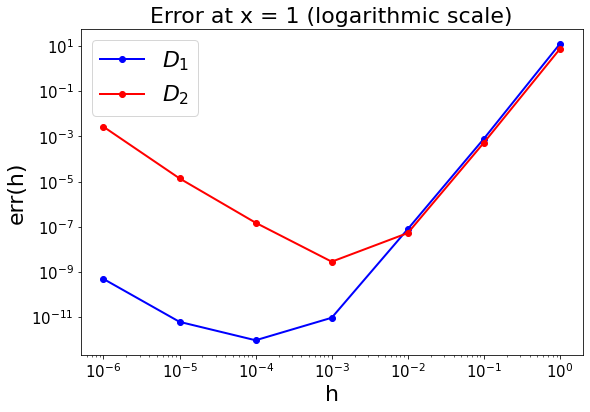

In [40]:
#code for problem 1
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

def f(x):
    return np.exp(2*x)
def derivf1(x):
    return 2*np.exp(2*x)
def derivf(x): #third derivative 
    return 4*np.exp(2*x)

x0 = 1
N = 7
dx = [0]*N
df1 = [0]*N
df2 = [0]*N
err1 = [0]*N
err2 = [0]*N
a1 = [0]*N
a1[0] = 0
a2 = [0]*N
a2[0] = 0
h = 1

for i in range(N):
    dx[i] = h 
    df1[i] = (-1*f(x0+2*dx[i])+8*f(x0+dx[i]) - 8*f(x0 -dx[i]) + f(x0 - 2*dx[i]))/(dx[i]*12)
    df2[i] = (-1*f(x0+2*dx[i]) + 16*f(x0+dx[i]) -30*f(x0) + 16*f(x0-dx[i]) - f(x0-2*dx[i]))/(12*(dx[i]**2))
    err1[i] = abs(df1[i] - derivf1(x0))
    err2[i] = abs(df2[i] - derivf(x0))
    if i > 0:
        a1[i] = np.log(err1[i]/err1[i-1])/np.log(dx[i]/dx[i-1])
        a2[i] = np.log(err2[i]/err2[i-1])/np.log(dx[i]/dx[i-1])
    h = h/10

results = [(dx[i], df1[i], err1[i], a1[i], df2[i], err2[i], a2[i]) for i in range(N)]
print(tabulate(results, headers=["h", "D(h)", "|D(h) - f'(x0)|", "alpha"], floatfmt=".15g",tablefmt="presto"))

fig, ax = plt.subplots(figsize=(9,6))
ax.loglog(dx,err1,'bo-',label = '$D_1$', lw=2)
ax.loglog(dx,err2,'ro-',label = '$D_2$', lw=2)
ax.set_title("Error at x = 1 (logarithmic scale)",fontsize=22)
ax.set_xlabel('h',fontsize=22)
ax.set_ylabel('err(h)',fontsize=22)
ax.legend(fontsize=22)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
%reset -f


        |                     |                      |                  h |              D(h) |        |D(h) - f'(x0)| |              alpha
--------+---------------------+----------------------+--------------------+-------------------+------------------------+--------------------
 1      |  1927.07700056402   | 1867.96455177258     |  0                 | 148.048579071605  |  88.9361302801598      |  0
 0.1    |    80.1932924485999 |   21.0808436571547   |  1.9474806430071   |  59.7059431020677 |   0.593494310622454    |  2.17566166877933
 0.01   |    60.9157365722979 |    1.80328778085266  |  1.06782294748824  |  59.1183602725032 |   0.00591148105795725  |  2.00172025773819
 0.001  |    59.2900715190581 |    0.177622727612864 |  1.00656650500606  |  59.1125104421053 |   6.16506600934486e-05 |  1.98175857137576
 0.0001 |    59.1313664699555 |    0.01891767851032  |  0.972630694163113 |  59.112270633932  |   0.000178157513232691 | -0.460866411130378
 1e-05  |    65.7252030578093 |    6.6

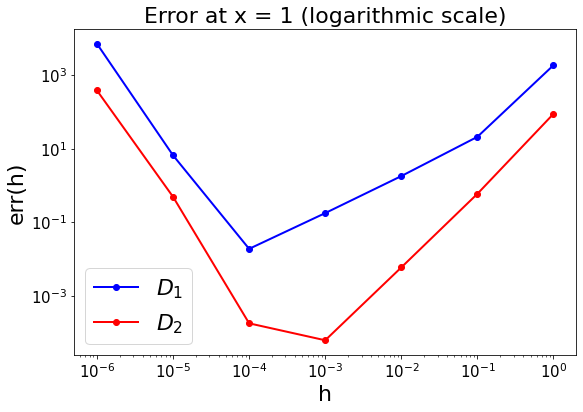

In [32]:
#code for problem 2
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.exp(2*x)

def derivf(x): #third derivative 
  return 8*np.exp(2*x)

x0 = 1
N = 7
dx = [0]*N
df1 = [0]*N
df2 = [0]*N
err1 = [0]*N
err2 = [0]*N
a1 = [0]*N
a1[0] = 0
a2 = [0]*N
a2[0] = 0
h = 1

for i in range(N):
    dx[i] = h 
    df1[i] = (f(x0+3*dx[i])-3*f(x0+2*dx[i]) + 3*f(x0 +dx[i]) - f(x0))/(dx[i]**3)
    df2[i] = (f(x0+2*dx[i]) - 2*f(x0+dx[i]) + 2*f(x0-dx[i]) - f(x0-2*dx[i]))/(2*(dx[i]**3))
    err1[i] = abs(df1[i] - derivf(x0))
    err2[i] = abs(df2[i] - derivf(x0))
    if i > 0:
        a1[i] = np.log(err1[i]/err1[i-1])/np.log(dx[i]/dx[i-1])
        a2[i] = np.log(err2[i]/err2[i-1])/np.log(dx[i]/dx[i-1])
    h = h/10

results = [(dx[i], df1[i], err1[i], a1[i], df2[i], err2[i], a2[i]) for i in range(N)]
print(tabulate(results, headers=["h", "D(h)", "|D(h) - f'(x0)|", "alpha"], floatfmt=".15g",tablefmt="presto"))

fig, ax = plt.subplots(figsize=(9,6))
ax.loglog(dx,err1,'bo-',label = '$D_1$', lw=2)
ax.loglog(dx,err2,'ro-',label = '$D_2$', lw=2)
ax.set_title("Error at x = 1 (logarithmic scale)",fontsize=22)
ax.set_xlabel('h',fontsize=22)
ax.set_ylabel('err(h)',fontsize=22)
ax.legend(fontsize=22)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
%reset -f

      h |                  D(h) |   |D(h) - f'(x0)| |                alpha
--------+-----------------------+-------------------+----------------------
 1      | -2.12431183797128     |  16.9024240358326 | 0
 0.1    | -0.147773202699358    |  14.9258854005607 | 0.054008889945005
 0.01   | -0.0014778112119041   |  14.7795900090732 | 0.0042777160809294
 0.001  | -1.4778112197852e-05  |  14.7781269759735 | 4.29929823663087e-05
 0.0001 | -1.47781121978604e-07 |  14.7781123456424 | 4.29951319906994e-07
 1e-05  | -1.47781121978552e-09 |  14.7781121993391 | 4.29951536213731e-09
 1e-06  | -1.47781121973741e-11 |  14.7781121978761 | 4.29951669112598e-11


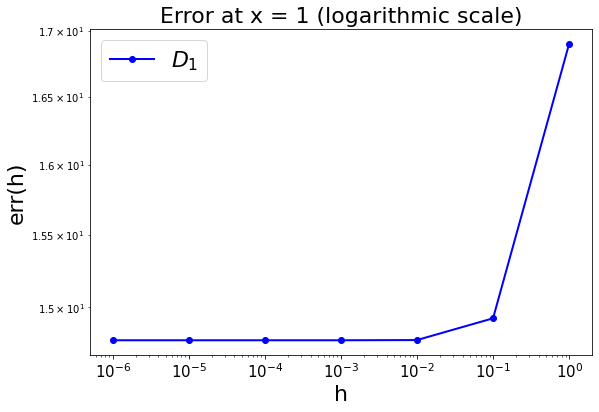

In [43]:
#code for number 3
from math import exp, log
from tabulate import tabulate
import matplotlib.pyplot as plt

def f(x):
    return exp(2*x)

def derivf(x): #third derivative 
    return 2*exp(2*x)

x0 = 1
N = 7
dx = [0]*N
df = [0]*N
err = [0]*N
a = [0]*N
a[0] = 0
h = 1

for i in range(N):
    dx[i] = h 
    df[i] = (-1/12*dx[i])*(-1*f(x0+2*dx[i]) + 8*f(x0+dx[i]) -8*f(x0-dx[i]) + f(x0-2*dx[i]))
    err[i] = abs(df[i] - derivf(x0))
    if i > 0:
        a[i] = log(err[i]/err[i-1])/log(dx[i]/dx[i-1])
    h = h/10

results = [(dx[i], df[i], err[i], a[i]) for i in range(N)]
print(tabulate(results, headers=["h", "D(h)", "|D(h) - f'(x0)|", "alpha"], floatfmt=".15g",tablefmt="presto"))

fig, ax = plt.subplots(figsize=(9,6))
ax.loglog(dx,err,'bo-',label = '$D_1$', lw=2)
ax.set_title("Error at x = 1 (logarithmic scale)",fontsize=22)
ax.set_xlabel('h',fontsize=22)
ax.set_ylabel('err(h)',fontsize=22)
ax.legend(fontsize=22)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
%reset -f